In [48]:
import pandas as pd
from src.utility import get_root
import os

file_path_adam = os.path.join(get_root(), "adam_variants_metrics.xlsx")
file_path_opt = os.path.join(get_root(), "optimization_metrics_comparison.xlsx")
adam = pd.read_excel(file_path_adam)
all_opt = pd.read_excel(file_path_opt)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

def make_plots(df, n_opt):
    sns.set(style="darkgrid")

    optimizers = df["Optimizer"].unique()
    colors = itertools.cycle(sns.color_palette("tab10", len(optimizers)))

    datasets = ['CIFAR10', 'CIFAR100']
    models = ['ResNet18', 'MobileNetV2']

    for dataset in datasets:
        for model in models:
            df_subset = df[(df["Dataset"] == dataset) & (df["Model"] == model)]

            if df_subset.empty:
                print(f"No data available for {model} on {dataset}. Skipping...")
                continue

            # --- Chart 1: Loss ---
            plt.figure(figsize=(12, 6))
            colors = itertools.cycle(sns.color_palette("tab10", len(optimizers)))
            for opt, color in zip(optimizers, colors):
                subset = df_subset[df_subset["Optimizer"] == opt]
                plt.plot(subset["Epoch"], subset["Train_Loss"], label=f"{opt} - Train", linestyle="dashed", color=color)
                plt.plot(subset["Epoch"], subset["Val_Loss"], label=f"{opt} - Val", color=color)

            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title(f"Training and Validation Loss over Epochs for {dataset} with {model} Model")
            plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=n_opt)
            plt.show()

            # --- Chart 2: Accuracy ---
            plt.figure(figsize=(12, 6))
            colors = itertools.cycle(sns.color_palette("tab10", len(optimizers)))
            for opt, color in zip(optimizers, colors):
                subset = df_subset[df_subset["Optimizer"] == opt]
                plt.plot(subset["Epoch"], subset["Train_Acc"], label=f"{opt} - Train", linestyle="dashed", color=color)
                plt.plot(subset["Epoch"], subset["Val_Acc"], label=f"{opt} - Val", color=color)

            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.title(f"Training and Validation Accuracy over Epochs for {dataset} with {model} Model")
            plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=n_opt)
            plt.show()

            # --- Chart 3: F1 Score ---
            plt.figure(figsize=(12, 6))
            colors = itertools.cycle(sns.color_palette("tab10", len(optimizers)))
            for opt, color in zip(optimizers, colors):
                subset = df_subset[df_subset["Optimizer"] == opt]
                plt.plot(subset["Epoch"], subset["Train_F1"], label=f"{opt} - Train", linestyle="dashed", color=color)
                plt.plot(subset["Epoch"], subset["Val_F1"], label=f"{opt} - Val", color=color)

            plt.xlabel("Epoch")
            plt.ylabel("F1 Score")
            plt.title(f"Training and Validation F1 Score over Epochs for {dataset} with {model} Model")
            plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=n_opt)
            plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Optimizer", y="VRAM(MB)", data=df)
    plt.xlabel("Optimizer")
    plt.ylabel("VRAM Usage (MB)")
    plt.title("VRAM Usage Comparison Across Optimizers")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Optimizer", y="Time(s)", data=df)
    plt.xlabel("Optimizer")
    plt.ylabel("Time per Epoch (s)")
    plt.title("Time per Epoch Across Optimizers")
    plt.xticks(rotation=45)
    plt.show()

    # Loop through each dataset and model combination
    for dataset in datasets:
        for model in models:
            # Filter the DataFrame for the current dataset and model
            df_subset = df[(df["Dataset"] == dataset) & (df["Model"] == model)]

            # Check if the subset is empty
            if df_subset.empty:
                print(f"No data available for {model} on {dataset}. Skipping...")
                continue

            # Find the best overall F1-score
            best_overall_f1 = df_subset["Val_F1"].max()
            threshold_f1 = 0.8 * best_overall_f1

            # Find cumulative time taken by each optimizer to reach 80% of best F1-score
            optimizers = df_subset["Optimizer"].unique()
            time_to_threshold = {}

            for opt in optimizers:
                opt_df = df_subset[df_subset["Optimizer"] == opt].sort_values(by="Epoch")
                opt_df["Cumulative_Time"] = opt_df["Time(s)"].cumsum()  # Accumulate time over epochs

                reached = opt_df[opt_df["Val_F1"] >= threshold_f1]

                if not reached.empty:
                    time_to_threshold[opt] = reached.iloc[0]["Cumulative_Time"]  # First time reaching threshold

            # Convert to DataFrame for plotting
            time_df = pd.DataFrame(list(time_to_threshold.items()), columns=["Optimizer", "Cumulative Time to 80% Best F1"])
            if time_df.empty:
                print(f"No optimizer reached 80% of best F1-score for {model} on {dataset}. Skipping plot...")
                continue
            time_df = time_df.sort_values(by="Cumulative Time to 80% Best F1")

            # Plot the results
            plt.figure(figsize=(10, 6))
            bars = plt.bar(time_df["Optimizer"], time_df["Cumulative Time to 80% Best F1"], color="skyblue")
            plt.ylabel("Cumulative Time (seconds)")
            plt.xlabel("Optimizer")
            plt.title(f"Cumulative Time to Reach 80% of Best F1-score ({dataset}, {model})")
            plt.xticks(rotation=45)
            plt.grid(axis="y", linestyle="--", alpha=0.7)

            # Add text labels on top of the bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}s", ha='center', va='bottom', fontsize=10, fontweight="bold")

            plt.show()


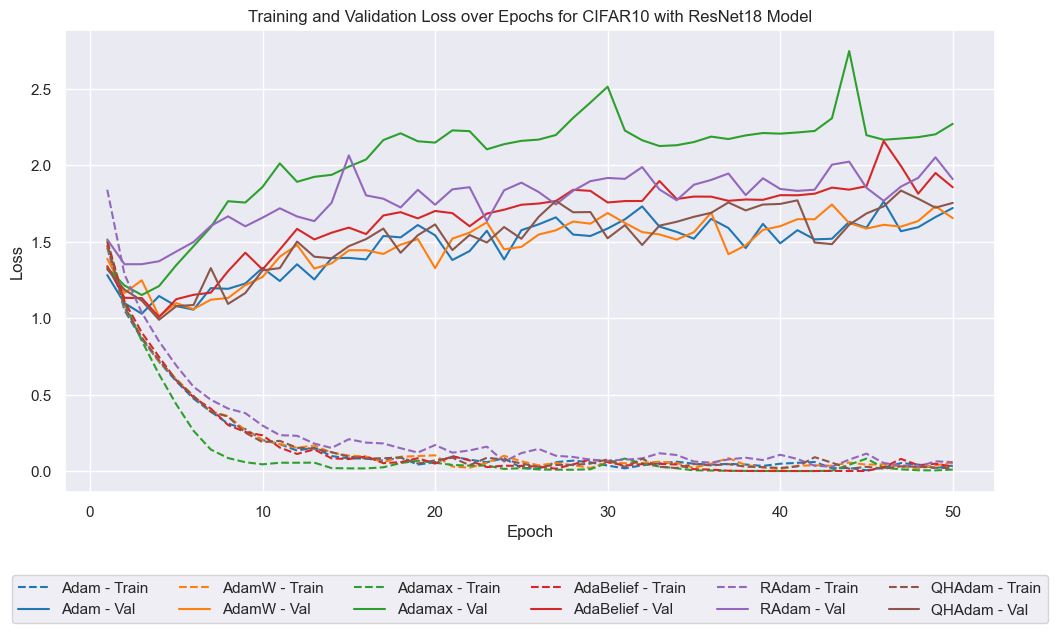

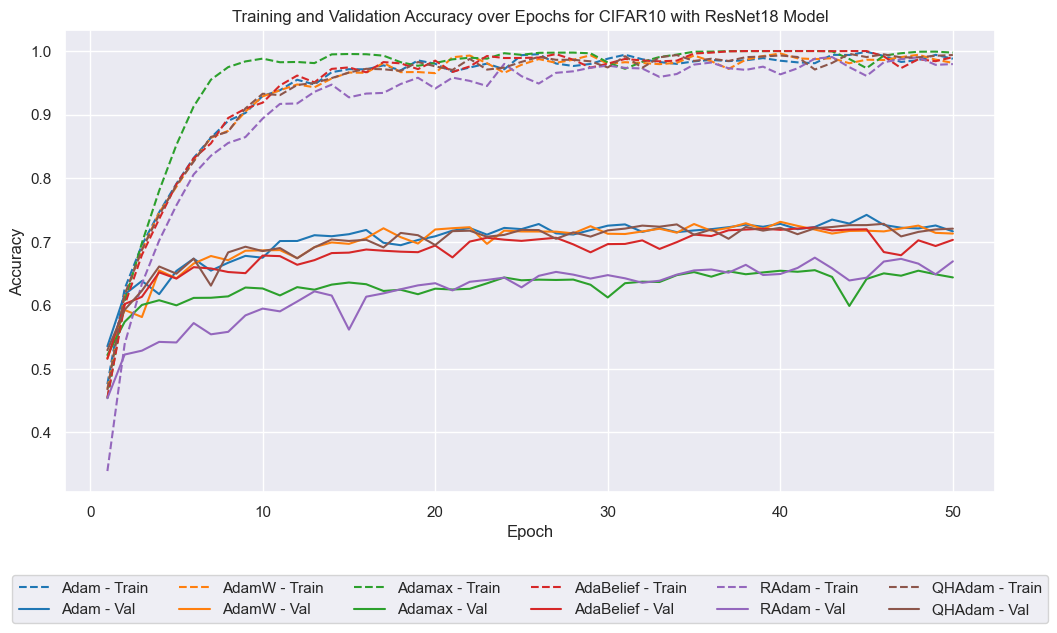

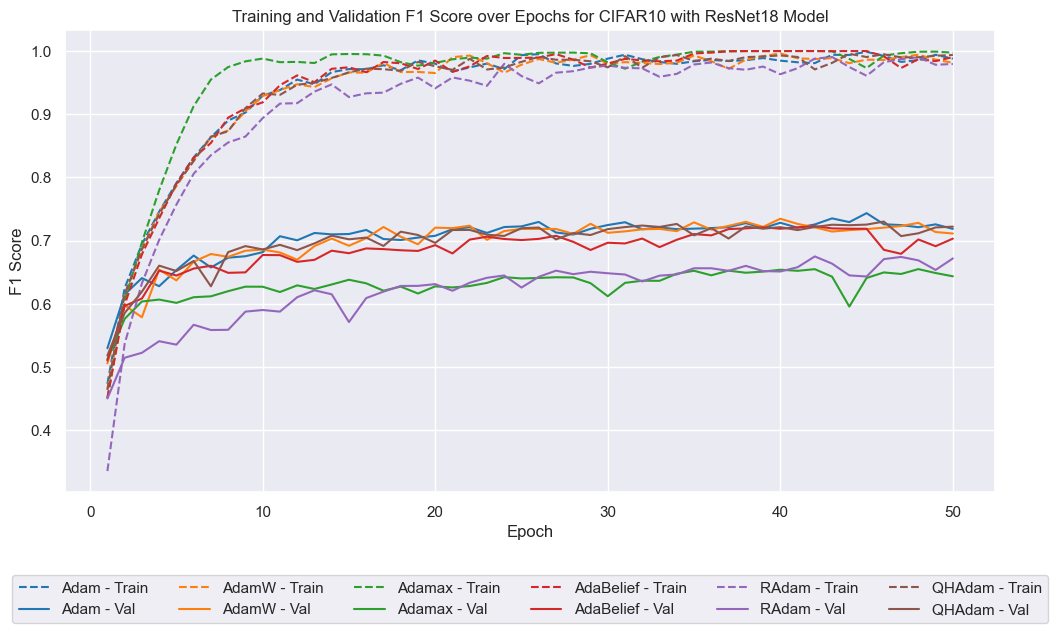

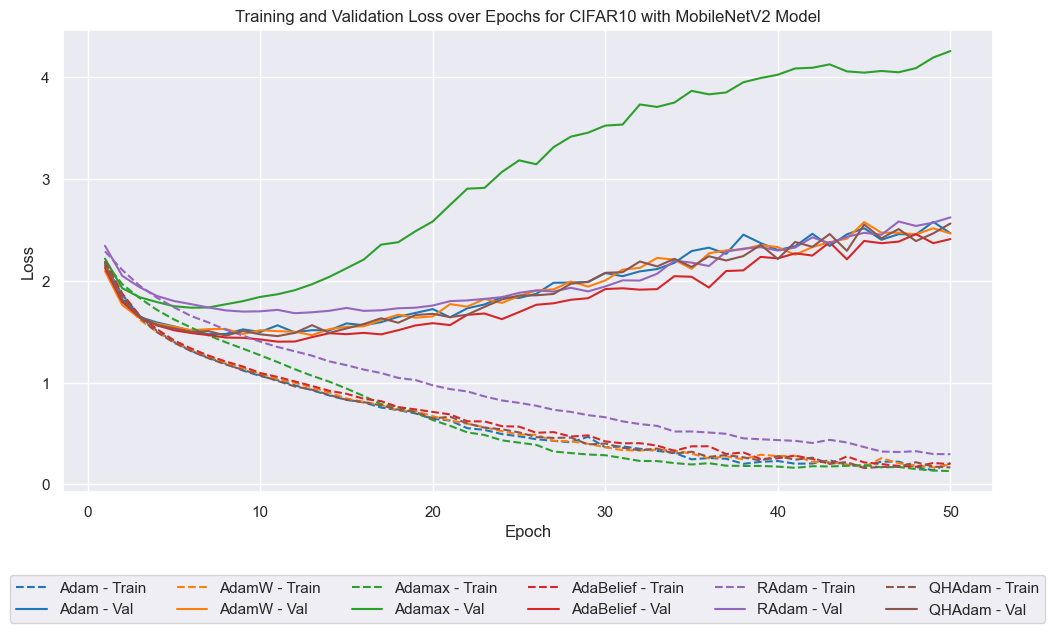

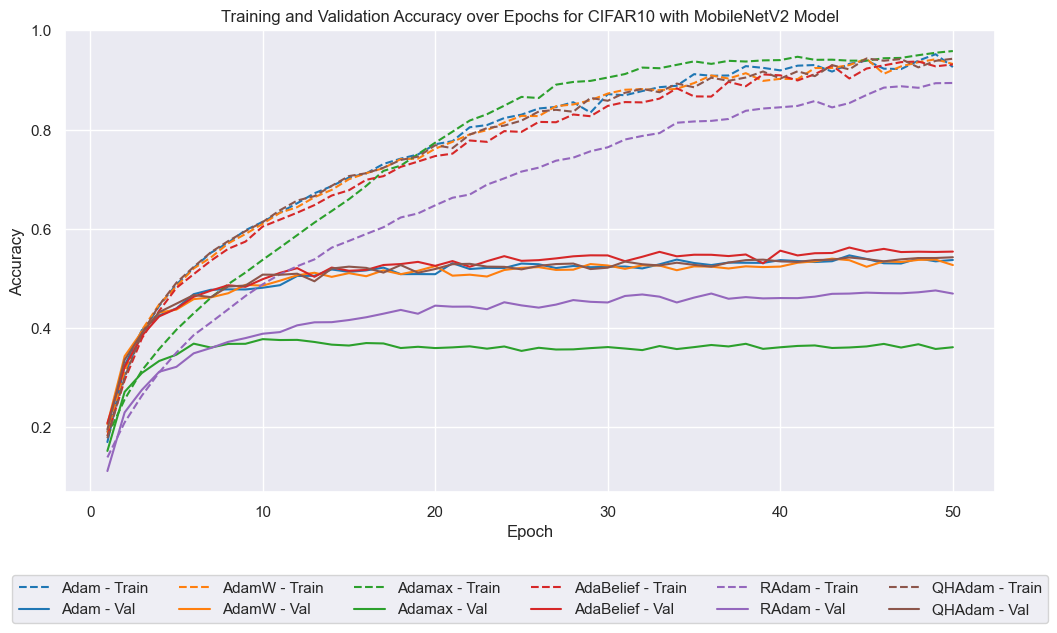

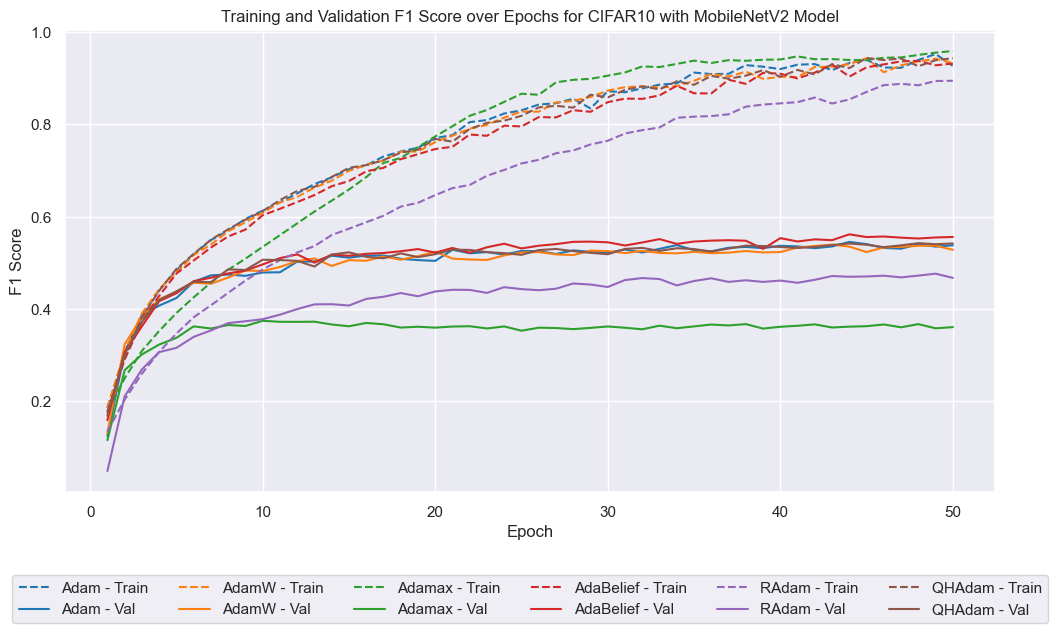

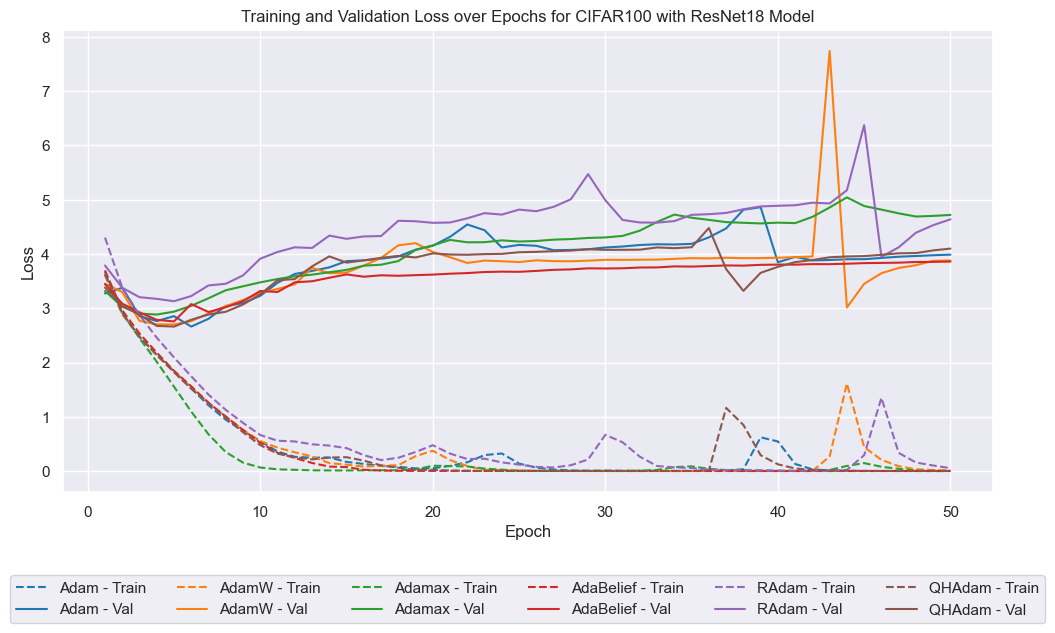

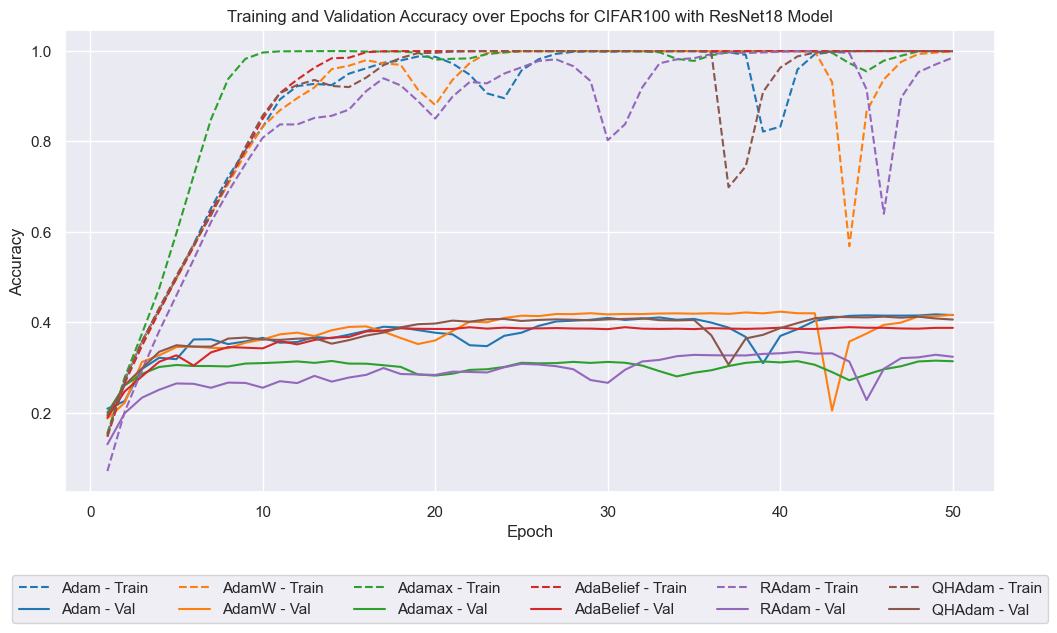

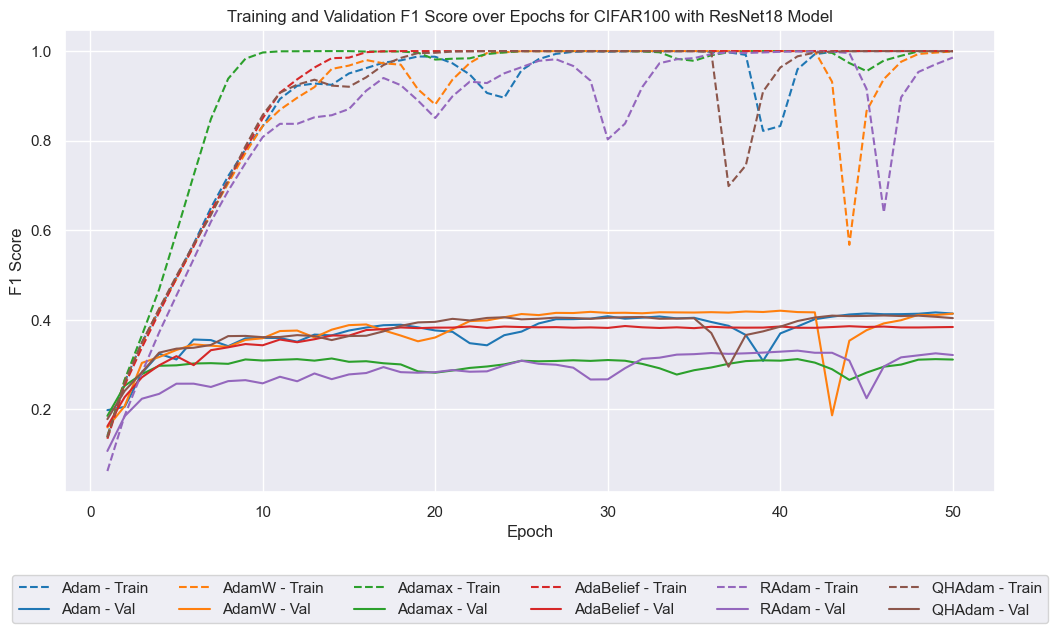

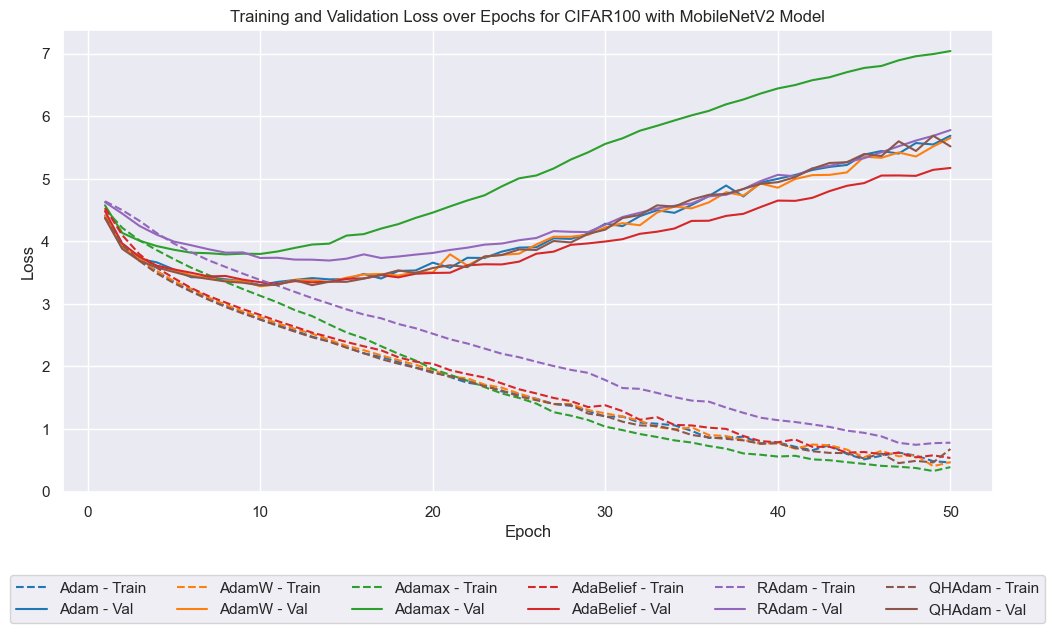

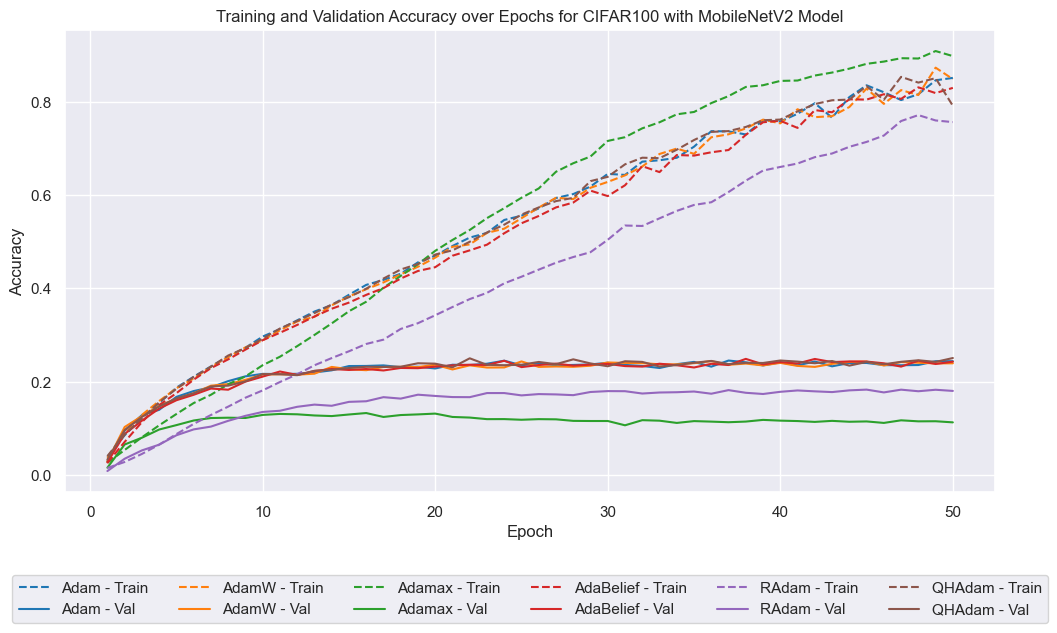

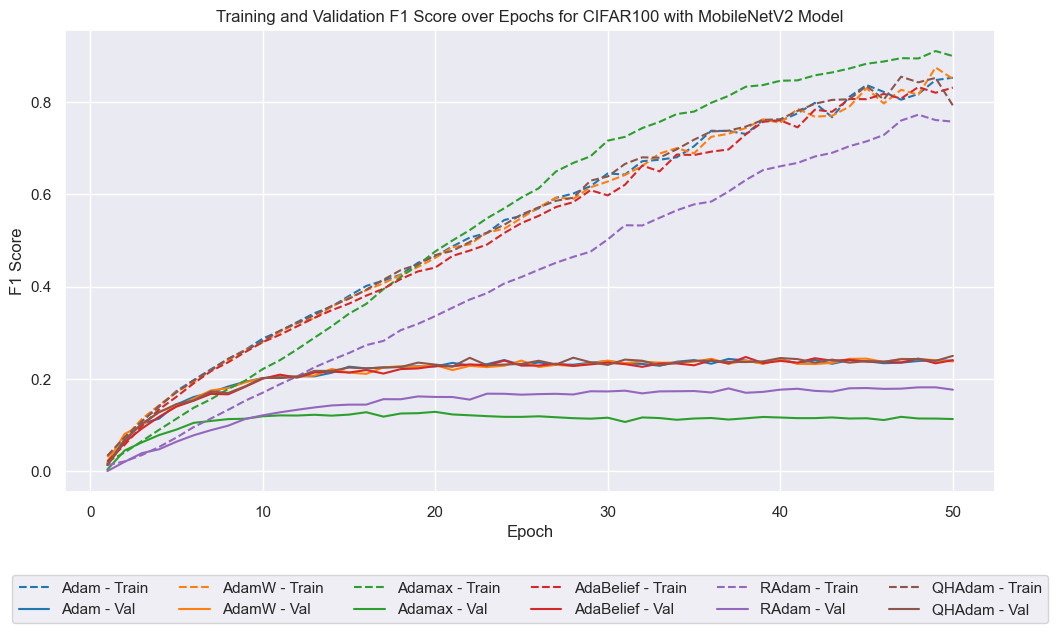

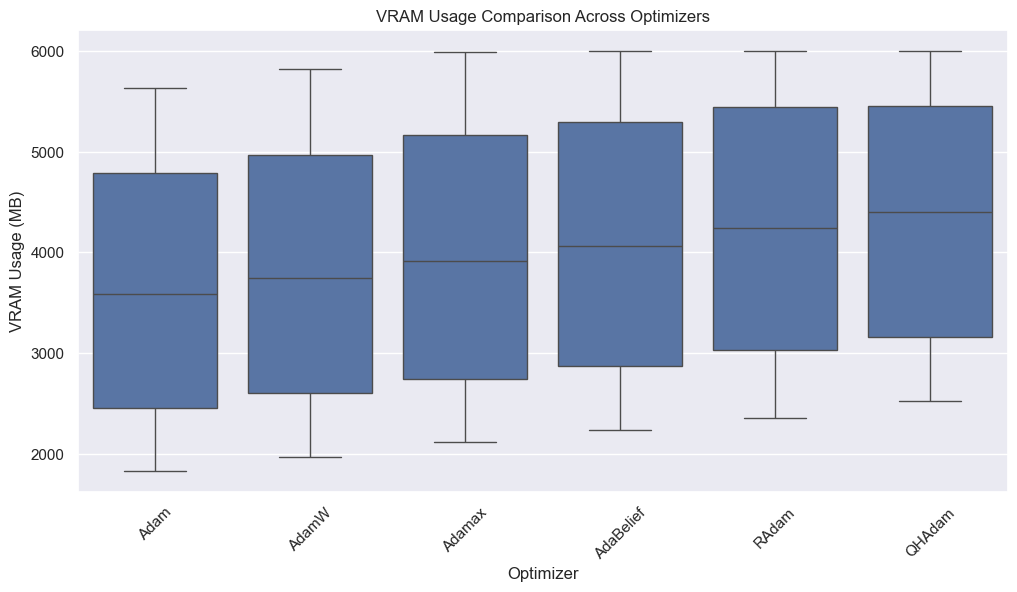

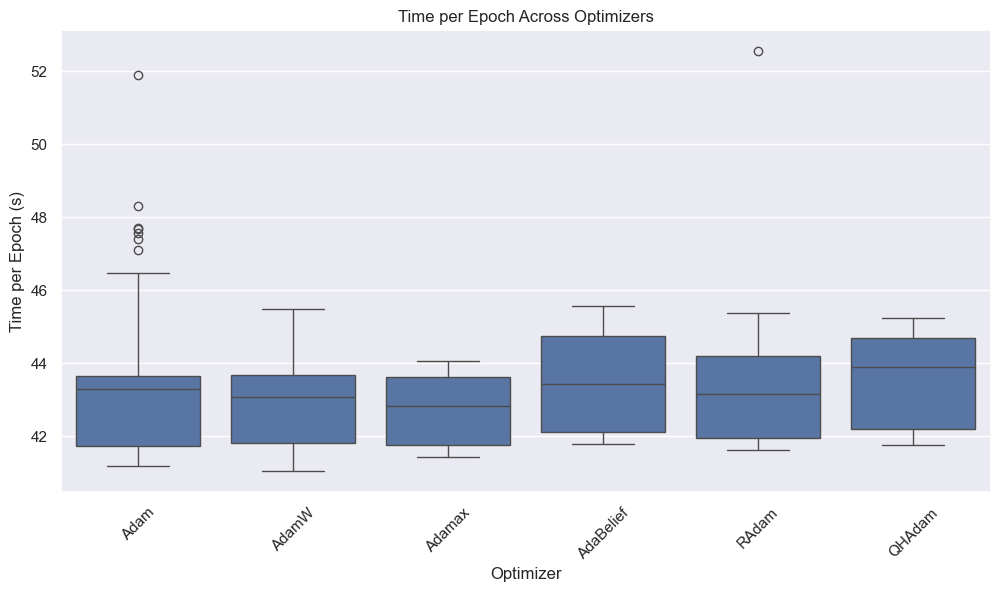

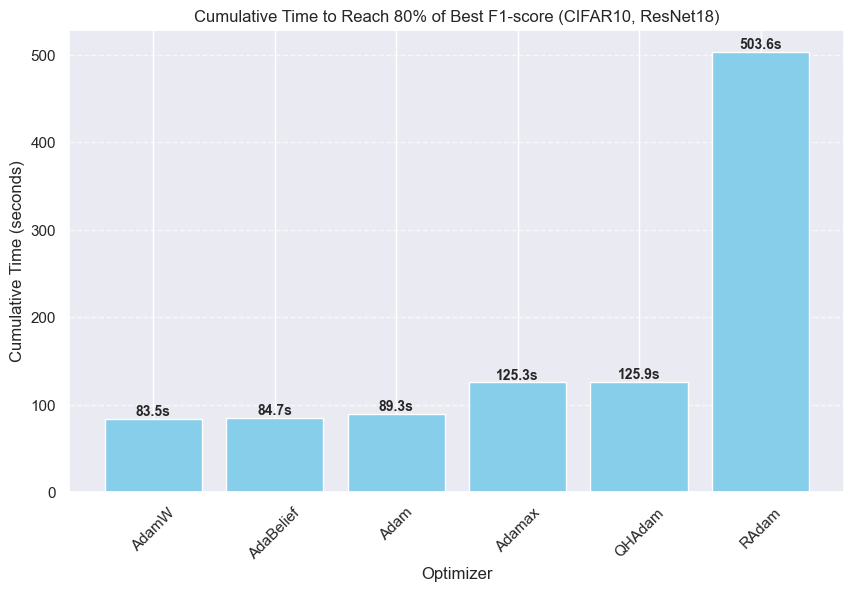

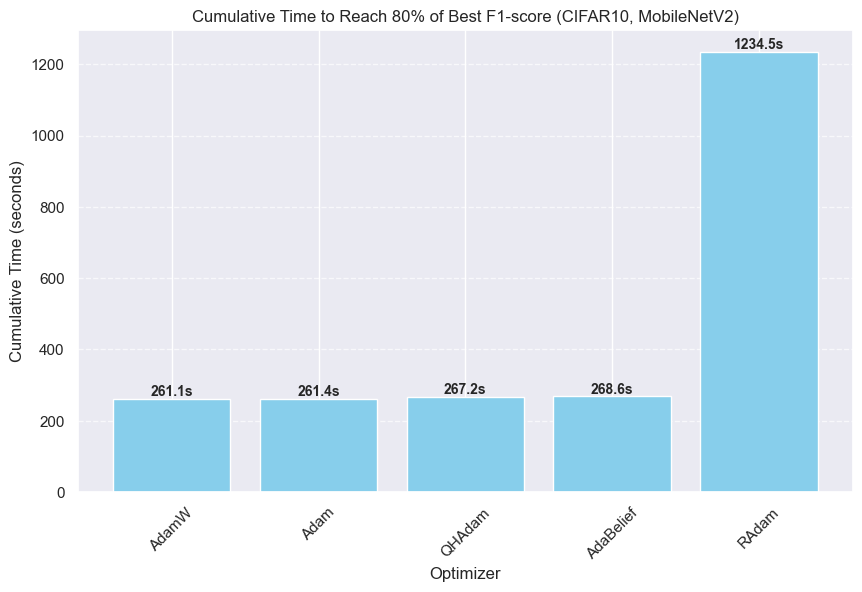

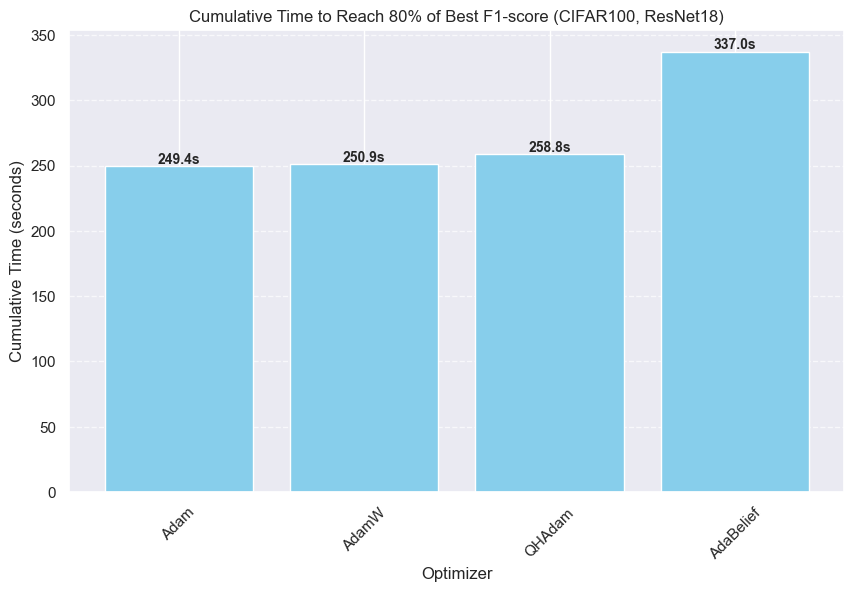

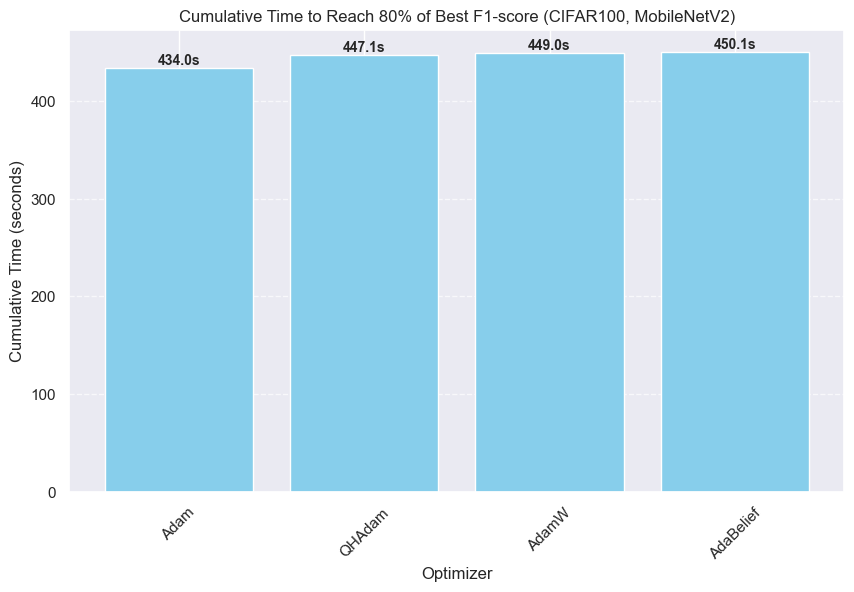

In [53]:
make_plots(adam, 6)

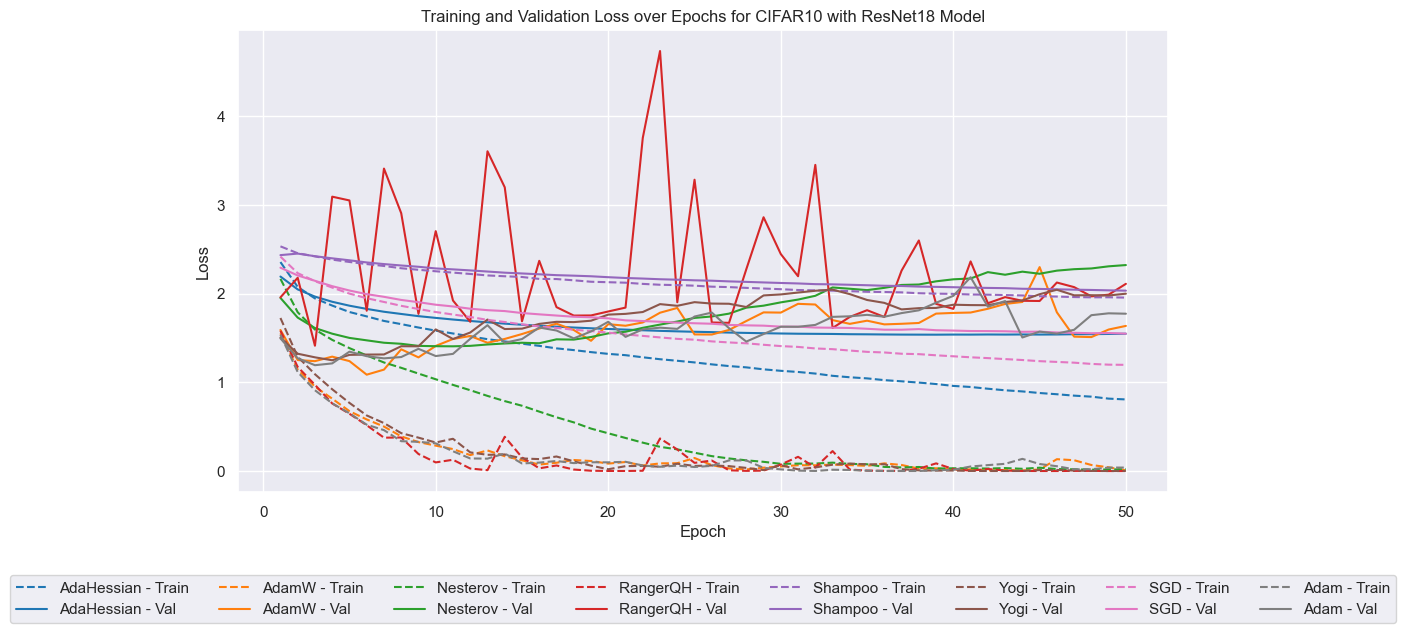

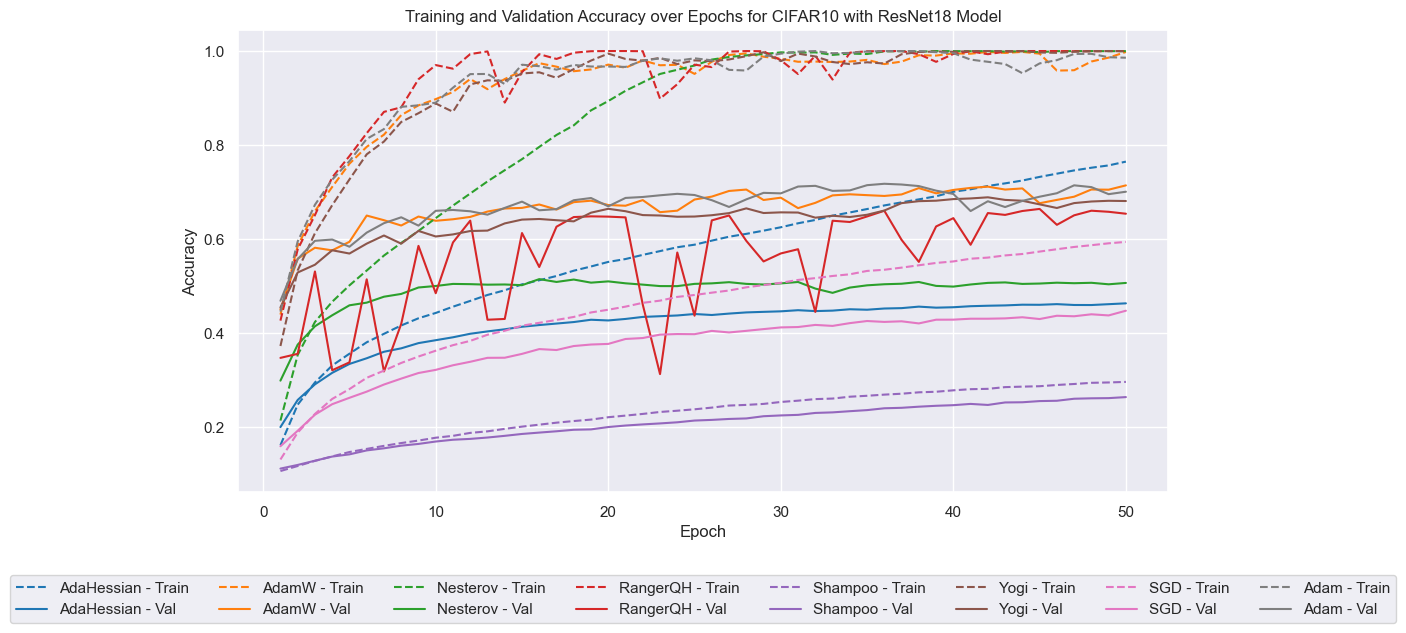

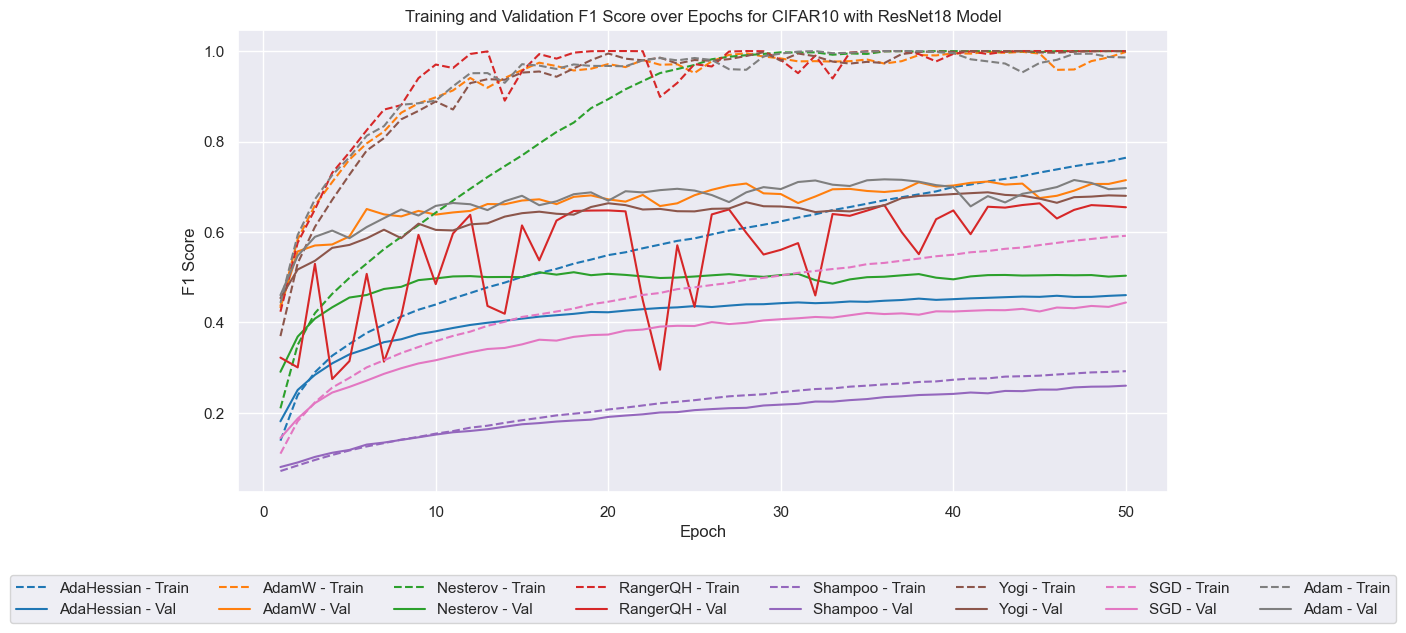

No data available for MobileNetV2 on CIFAR10. Skipping...


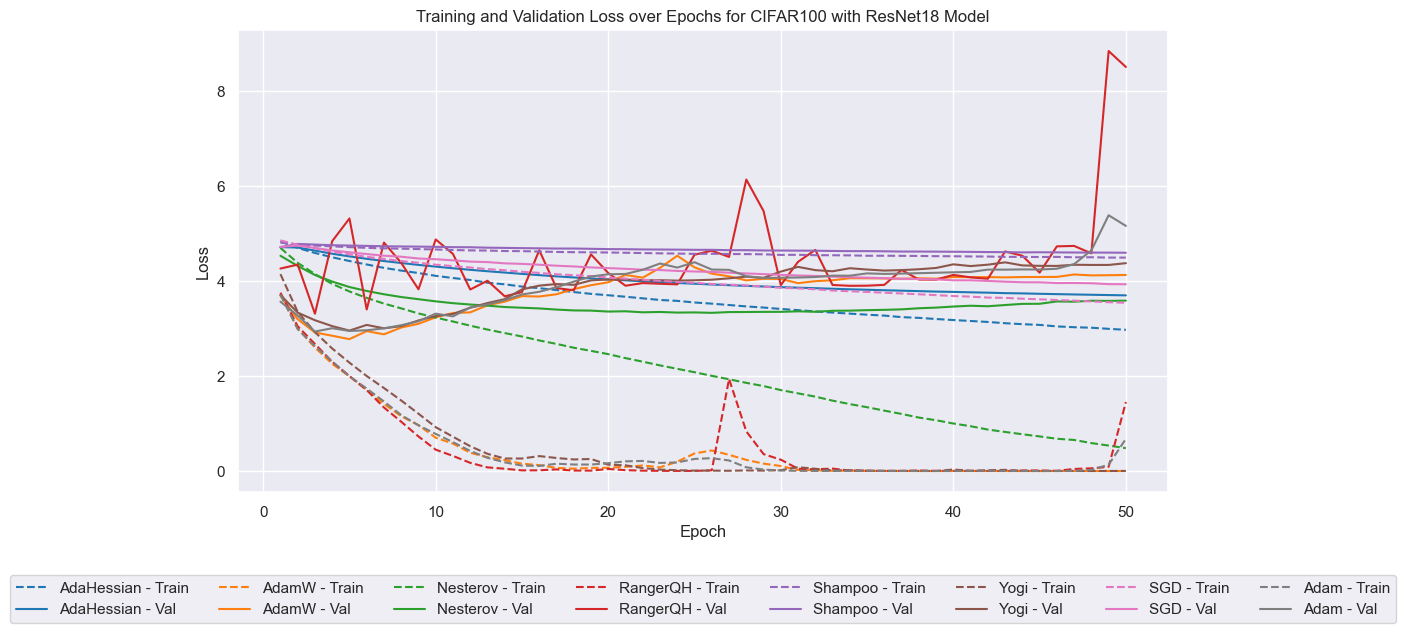

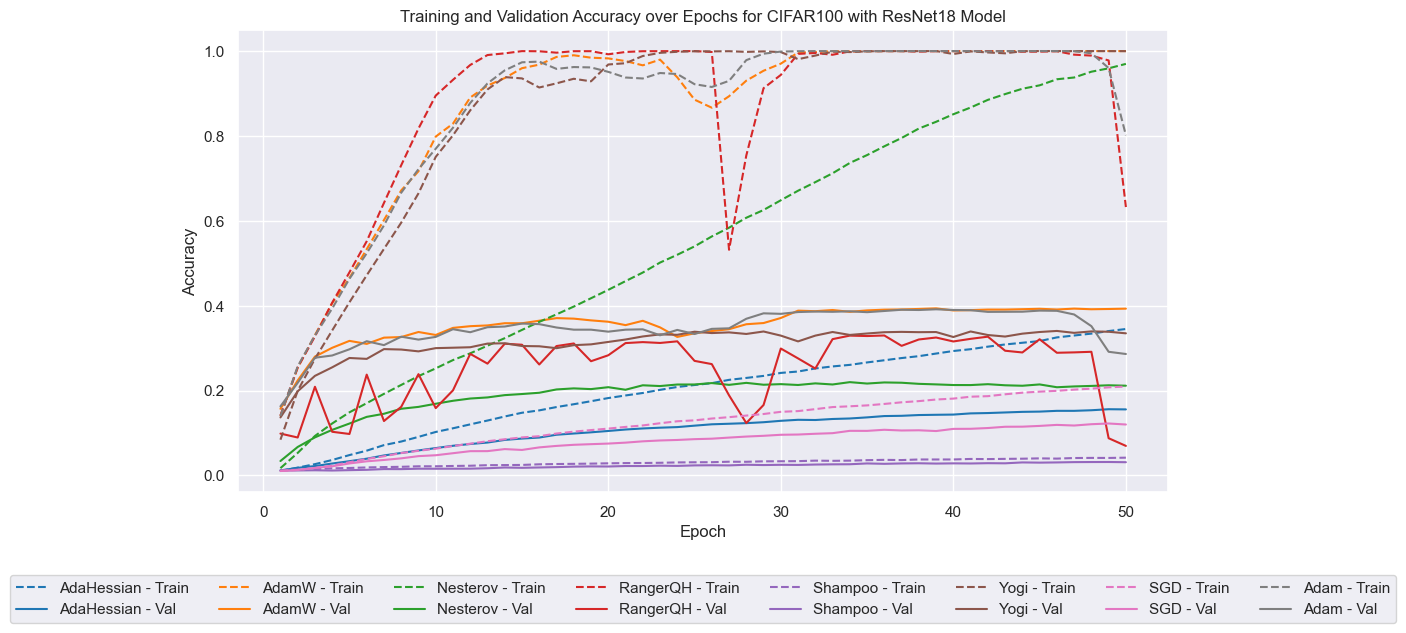

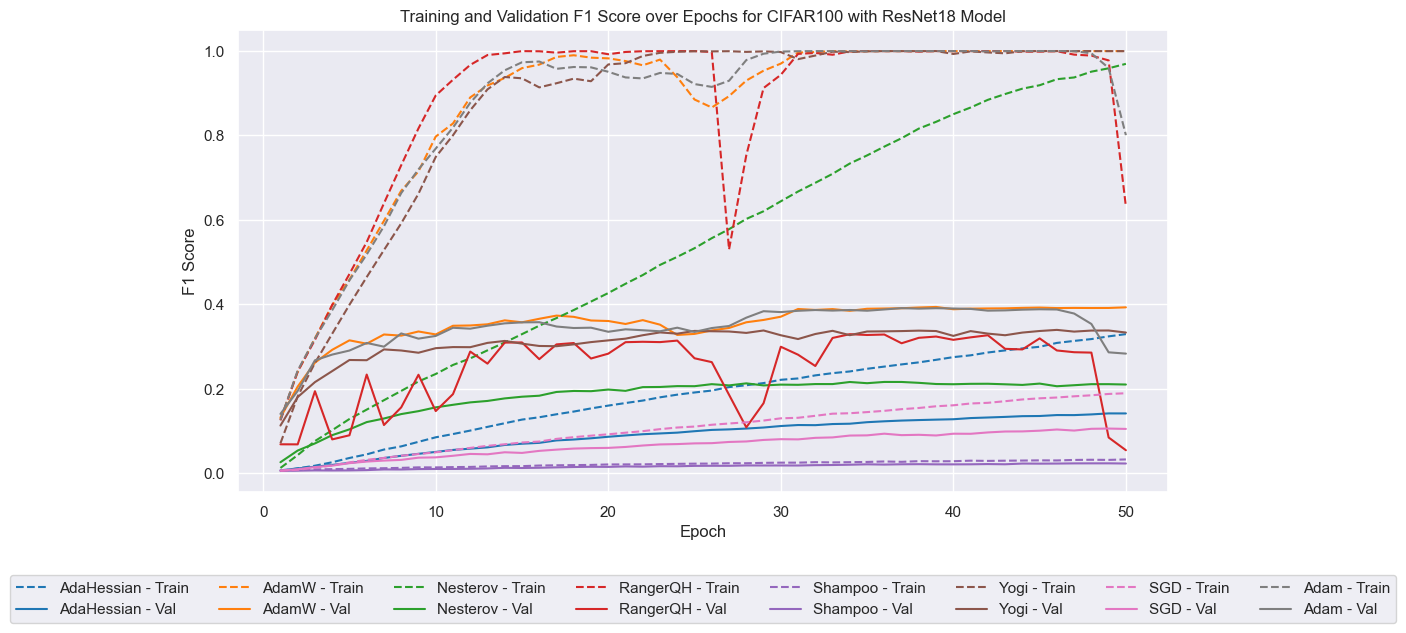

No data available for MobileNetV2 on CIFAR100. Skipping...


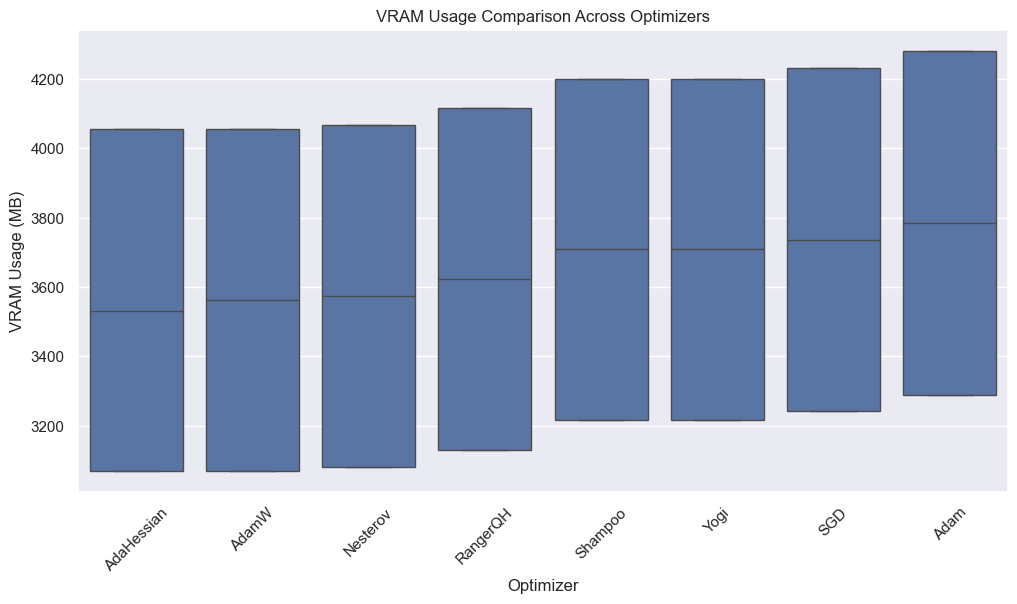

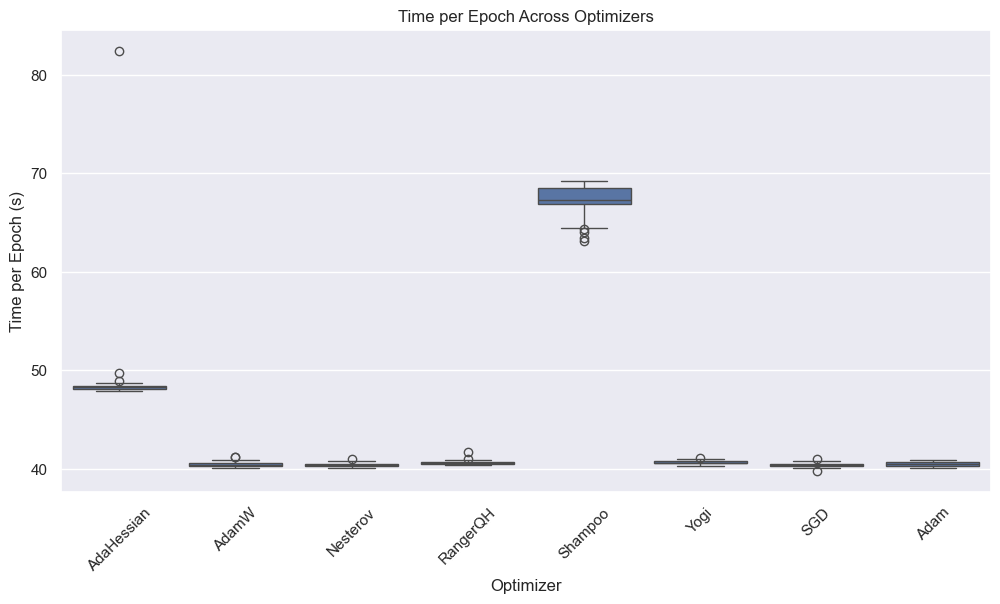

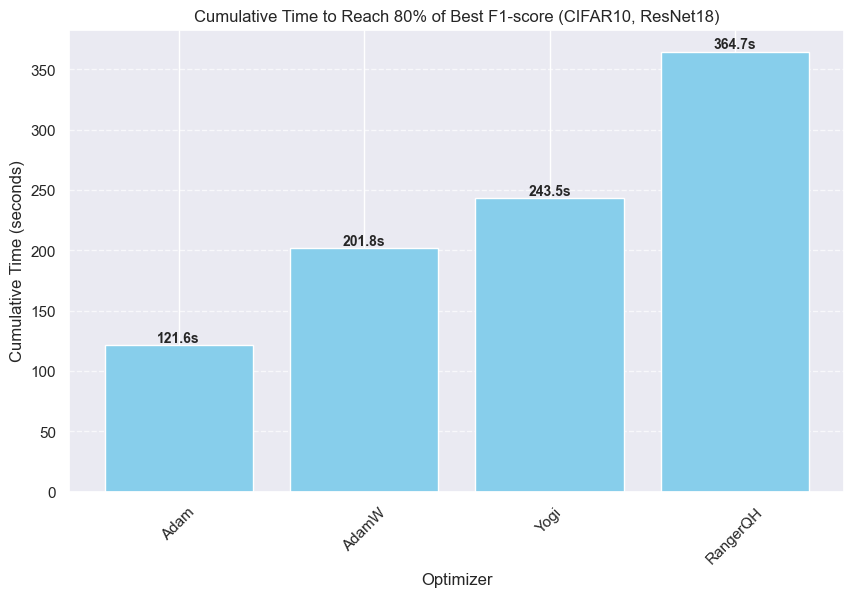

No data available for MobileNetV2 on CIFAR10. Skipping...


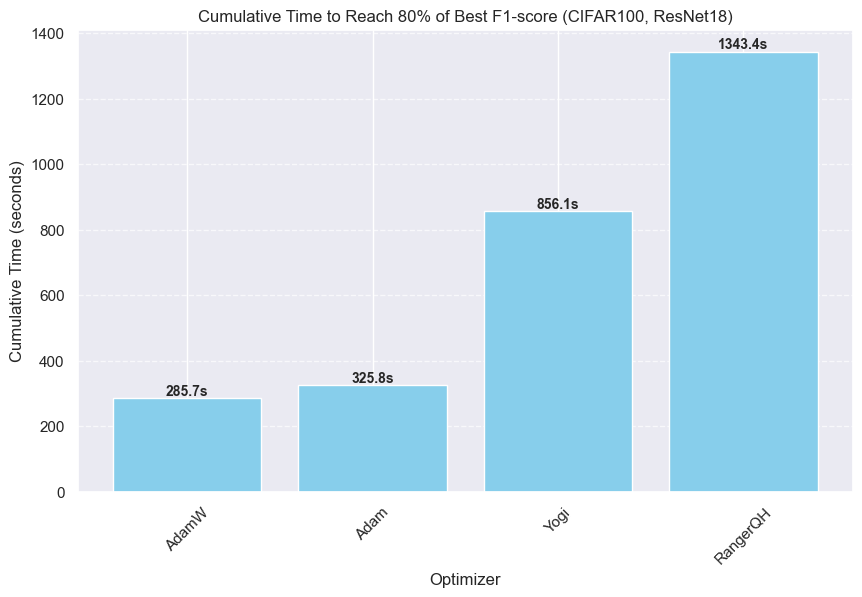

No data available for MobileNetV2 on CIFAR100. Skipping...


In [54]:
make_plots(all_opt, 8)